# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеки `pandas` и `os`.  
      
2) По аналогии с кодом, который вы использовали для сбора данных в 7-м уроке про грязные данные, сделайте следующее:  
a. создайте путь к папке `data`, используя ваш логин;  
b. соберите названия нужных вам файлов (`orders.csv`, `order_status.csv`, `products.csv`) в список `target_files`;  
c. создайте пустой список `data_files`, куда будете сохранять пути к файлам;  
d. с помощью функции `os.walk()` создайте генератор;  
e. с помощью цикла пройдитесь по генератору и, если название файла совпадает с нужным вам из списка `target_files`, путь к этому файлу добавьте в список `data_files`.
      
3) Используя пути к файлам из списка `data_files`, соберите полные датафреймы `df_orders`, `df_order_status` и `df_products`:  
a. создайте пустые списки `orders_df_list`, `order_status_df_list` и `products_df_list`, чтобы в них сложить данные для соответствующих датафреймов;  
b. с помощью цикла пройдитесь по путям в списке `data_files` и прочитайте датафрейм по этому пути. Добавьте датафрейм в тот или иной список в зависимости от того, название какого датасета содержит путь. Если в названии пути есть `orders.csv`, перед добавлением в список создайте колонки `manager` с именами менеджеров и `date` с датами. А если в названии пути есть `products.csv`, перед добавлением в список создайте колонку `category` с категориями товаров. Для создания колонок используйте подстроки из строки с путем.  
      
4) Каждый раз используя функцию `pd.concat` с параметром `ignore_index=True`, соберите данные в датафреймы: из списка `orders_df_list` в датафрейм `df_orders`, из списка `order_status_df_list` — в датафрейм `df_order_status`, а из списка `products_df_list` - в датафрейм `df_products`.
      
5) Проверьте размер каждого датафрейма и убедитесь, что:
- `df_orders` имеет размер (4603, 5)
- `df_order_status` — (346, 3)
- `df_products` — (1677, 4)
      
6) Сохраните каждый датафрейм в соответствующий csv файл, задав его название как строку и параметр `index=False`.
      
7) По одному скачайте получившиеся csv файлы из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код.

      
</p>
</details>

In [1]:
# Ваш код здесь
import pandas as pd
import os

In [2]:
data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/shared/homeworks/python_ds_miniprojects/final_project/data/'


In [3]:
login = 'jupyter-a-volodina'  # Замените на ваш логин
data = f'/mnt/HC_Volume_18315164/home-jupyter/{login}/shared/homeworks/python_ds_miniprojects/final_project/data'  # Пример пути

# b. Соберите названия нужных вам файлов в список `target_files`
target_files = ['orders.csv', 'order_status.csv', 'products.csv']

# c. Создайте пустой список `data_files`
data_files = []

# d. С помощью функции `os.walk()` создайте генератор
for path, dirs, files in os.walk(data):
    # e. С помощью цикла пройдитесь по генератору
    for file in files:
        # Если название файла совпадает с нужным вам из списка `target_files`
        if file in target_files:
            # Добавьте путь к этому файлу в список `data_files`
            data_files.append(os.path.join(path, file))

data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/shared/homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/shared/homeworks/python_ds_miniprojects/final_project/data/products/Система караоке/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/shared/homeworks/python_ds_miniprojects/final_project/data/products/Напольная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/shared/homeworks/python_ds_miniprojects/final_project/data/products/Полочная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/shared/homeworks/python_ds_miniprojects/final_project/data/products/Сабвуфер/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-volodina/shar

In [4]:
orders_df_list = []
order_status_df_list = []
products_df_list = []

# b. Пройдитесь по путям в списке `data_files`
for file in data_files:
    # Читаем датафрейм из файла
    df = pd.read_csv(file)
    
    # Проверяем, какой файл мы читаем и добавляем в соответствующий список
    if 'orders.csv' in file:
        # Создаем колонки `manager` и `date`
        df['manager'] = file.split('/')[-2]  # Предположим, что имя менеджера - это имя родительской папки
        df['date'] = pd.to_datetime(file.split('/')[-3]).date()  # Пример: текущая дата
        orders_df_list.append(df)
        
    elif 'order_status.csv' in file:
        order_status_df_list.append(df)
        
    elif 'products.csv' in file:
        # Создаем колонку `category`
        df['category'] = file.split('/')[-2]  # Предположим, что категория - это имя родительской папки
        products_df_list.append(df)

# Объединяем списки в один датафрейм, если это необходимо
df_orders = pd.concat(orders_df_list, ignore_index=True) if orders_df_list else pd.DataFrame()
df_order_status = pd.concat(order_status_df_list, ignore_index=True) if order_status_df_list else pd.DataFrame()
df_products = pd.concat(products_df_list, ignore_index=True) if products_df_list else pd.DataFrame()

# Выводим результаты
print("Orders DataFrame:")
print(df_orders.head())
print("\nOrder Status DataFrame:")
print(df_order_status.head())
print("\nProducts DataFrame:")
print(df_products.head())



Orders DataFrame:
        order_id  product_id  quantity             manager        date
0  QPLK-54839036         489        11  Владимир Ударников  2024-03-10
1  QPLK-54839036         594         6  Владимир Ударников  2024-03-10
2  QPLK-54839036         670        16  Владимир Ударников  2024-03-10
3  QPLK-54839036         469         9  Владимир Ударников  2024-03-10
4  QPLK-54839036        1302         5  Владимир Ударников  2024-03-10

Order Status DataFrame:
        order_id  client_id     status
0  QPLK-54839036         52  confirmed
1  MAQJ-95867467         84   canceled
2  KHLF-51759445         23  confirmed
3  DALF-47566548         97  confirmed
4  BZHU-92977894         29   canceled

Products DataFrame:
    id               name    price    category
0  207  Denon, AVR-S540BT   243.52  AV-ресивер
1  208  Denon, AVR-X3700H  1305.52  AV-ресивер
2  209  Denon, AVR-X4700H  1620.21  AV-ресивер
3  210  Denon, AVR-X6700H  2050.31  AV-ресивер
4  211  Denon, AVC-X4700H  1496.81  AV-ре

In [5]:

# Шаг 6: Сохранение датафреймов в CSV файлы
df_orders.to_csv('orders.csv', index=False)
df_order_status.to_csv('order_status.csv', index=False)
df_products.to_csv('products.csv', index=False)


# Шаг 7: Скачивание файлов из JupyterHub
# В JupyterHub вы можете использовать следующий код для скачивания файлов:
# Просто выполните следующую команду в ячейке JupyterHub, чтобы скачать файлы:
# !cp orders.csv /path/to/your/notebook/directory/
# !cp order_status.csv /path/to/your/notebook/directory/
# !cp products.csv /path/to/your/notebook/directory/

### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Переведите колонку `date` в тип `datetime`.
      
2) Сгруппируйте данные по дате и посчитайте число уникальных заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
3) Отсортируйте данные по убыванию числа заказов и возьмите дату из верхней строчки.
      
</p>
</details>

In [6]:
# Ваш код здесь
df_orders
df_order_status
df_products

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


In [7]:
df_orders['date'] = pd.to_datetime(df_orders['date'])

In [8]:
df_orders

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


In [9]:
date_orders = df_orders.groupby('date', as_index=False) \
        .agg({'order_id': 'count'}) \
        .rename(columns={'order_id': 'orders'}) \
        .sort_values(by='orders', ascending=False)

In [10]:
date_orders

,date,orders
13,2024-03-14,437
12,2024-03-13,339
0,2024-03-01,302
28,2024-03-29,241
25,2024-03-26,231
14,2024-03-15,225
4,2024-03-05,222
19,2024-03-20,222
5,2024-03-06,221
26,2024-03-27,203


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеку `seaborn` и модуль `pyplot` из библиотеки `matplotlib`.
      
2) Чтобы все графики в ноутбуке имели одинаковое форматирование, можете установить общие настройки через `sns.set()`.
      
3) Постройте линейный график, где по оси `х` будут идти даты, а по оси `у` — количество заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.
      
</p>
</details>

(array([738945., 738946., 738950., 738954., 738958., 738962., 738966.,
        738970., 738974., 738977.]),
 <a list of 10 Text major ticklabel objects>)

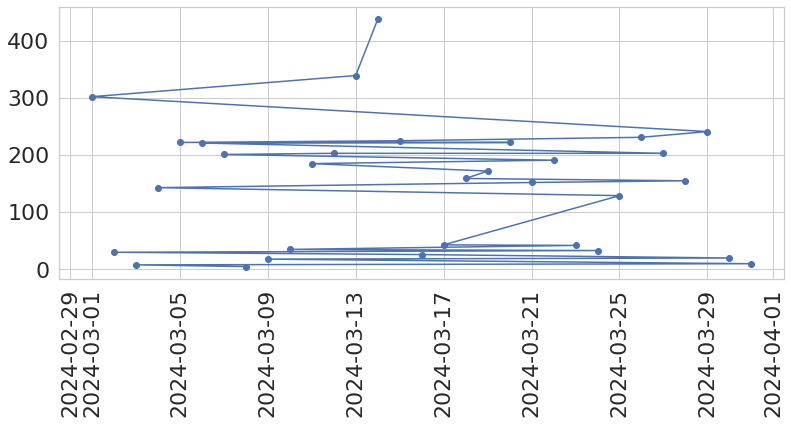

In [11]:
# Ваш код здесь
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(
 font_scale=2,
 style="whitegrid",
 rc={'figure.figsize':(13,5)}
 )
plt.plot(date_orders.date, date_orders.orders, marker='o')
plt.xticks(rotation=90)

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Проверьте каждый из четырех предложенных поинтов: есть ли дни, соответствующие одному или нескольким поинтам? Посмотрите на график или на значения в датафрейме с количеством заказов по дням.
      
</p>
</details>

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Объедините датафреймы `df_orders` и `df_order_status` в новый `orders_status`.
      
2) Можете вывести первые строчки нового датафрейма и посмотреть его размер, чтобы убедиться, что объединение прошло корректно.
      
3) Сохраните датафрейм в csv файл с помощью метода, задав его название как строку `orders_status.csv` и параметр `index=False`.
      
4) Скачайте получившийся csv файл из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код. 
      
</p>
</details>

In [12]:
# Ваш код здесь
orders_status = df_orders.merge(df_order_status)

In [13]:
orders_status.to_csv('orders_status.csv', index=False)

In [14]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Чтобы оставить в данных только информацию о том, был заказ подтвержден или отменен, выберите из датафрейма `orders_status` колонки с номером заказа и статусом, а затем удалите дубликаты (НЕ сохраняйте результат в тот же датафрейм, потому что `orders_status` в полном виде понадобится для решения следующих заданий).

2) Посчитайте частоту, с которой встречается каждый из статусов в оставшихся данных.

3) Посчитайте долю каждого из статусов. Значения округлите до 2 знаков после точки.

      
</p>
</details>

In [15]:
status_data = orders_status[['order_id', 'status']].drop_duplicates()

In [16]:
status_counts = status_data['status'].value_counts()

In [17]:
status_counts

confirmed    309
canceled      37
Name: status, dtype: int64

In [18]:
total_orders = status_counts.sum()
status_ratios = (status_counts / total_orders).round(2)

In [19]:
status_ratios

confirmed    0.89
canceled     0.11
Name: status, dtype: float64

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Данные в датафрейме `orders_status` сгруппируйте по дате и статусу, посчитайте количество уникальных заказов для каждой группы. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Разверните получившийся датафрейм так, чтобы получилась сводная таблица, где в индексе — даты, в колонках — статусы, а в значениях — количество заказов. 
      
3) Пропуски заполните нулями.
      
4) Из-за того, что после разворота таблицы в колонках `canceled` и `confirmed` появились пропущенные значения, тип данных в этих колонках стал `float`. Но число заказов не может быть дробным, поэтому приведите эти колонки к типу `int`.
      
5) Отфильтруйте строки, где значение в колонке `confirmed` равно нулю.
      
</p>
</details>

In [23]:
ord_st = orders_status.groupby(['date', 'status'], as_index=False) \
             .agg({'order_id':'count'}) \
             .rename(columns={'order_id': 'orders'}) \
             .pivot(index='date', columns='status', values='orders') \
             .fillna(0)

In [26]:
ord_st

status,canceled,confirmed
date,,
2024-03-01,29,273
2024-03-02,0,30
2024-03-03,0,8
2024-03-04,0,143
2024-03-05,0,222
2024-03-06,12,209
2024-03-07,5,196
2024-03-08,0,5
2024-03-09,18,0


In [24]:
ord_st.canceled = ord_st.canceled.astype('int') 
ord_st.confirmed = ord_st.confirmed.astype('int')                        

In [25]:
ord_st.query('confirmed == 0')

status,canceled,confirmed
date,,
2024-03-09,18,0


In [35]:
ord_st.reset_index(inplace=True)

In [36]:
 print(ord_st.columns) 

Index(['date', 'canceled', 'confirmed'], dtype='object', name='status')


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Постройте линейный график, где по оси `х` будут идти даты, по оси `у` — количество заказов, а цвета линий будут определены статусами заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.

</p>
</details>

(array([738945., 738946., 738950., 738954., 738958., 738962., 738966.,
        738970., 738974., 738977.]),
 <a list of 10 Text major ticklabel objects>)

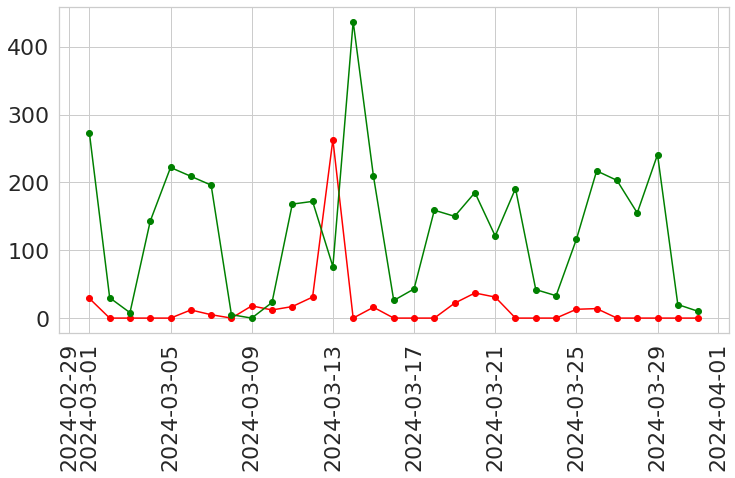

In [37]:
# Ваш код здесь
plt.figure(figsize=(12, 6))

plt.plot(ord_st.date, ord_st.canceled, label='Canceled', color='red', marker='o')
plt.plot(ord_st.date, ord_st.confirmed, label='Confirmed', color='green', marker='o')
plt.xticks(rotation=90)


## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите все отмененные заказы 13 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
2) Отберите все подтвержденные заказы 14 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
3) Объедините эти датафреймы с заказами по совпадающим характеристикам: имя менеджера, id клиента, число уникальных товаров в заказе и общее число товаров в штуках. Так у вас получатся те заказы, которые отменили в первый день и оформили заново на следующий.
      
4) Посчитайте число строк в датафрейме с заказами, которые отменили в первый день и оформили заново на следующий. Разделите это число на число строк в датафрейме с подтвержденными заказами 14 марта. Так вы узнаете долю заказов, которые повторяют вчерашние.
      
</p>
</details>

In [50]:
# Ваш код здесь
cancel13 = orders_status.query('date == "2024-03-13" & status == "canceled"') 

In [66]:
aggregated_data13 = cancel13.groupby('date').agg(
    unique_products=('product_id', 'nunique'),  # Количество уникальных товаров
    total_quantity=('quantity', 'sum'),         # Сумма единиц всех товаров
    manager=('manager', 'max'),                 # Менеджер
    client=('client_id', 'max')                    # Клиент
).reset_index()

In [67]:
aggregated_data13

,date,unique_products,total_quantity,manager,client
0,2024-03-13,229,4861,Маргарита Камертонова,95


In [55]:
conf14 = orders_status.query('date == "2024-03-14" & status == "confirmed"') 

In [56]:
aggregated_data14 = conf14.groupby('date').agg(
    unique_products=('product_id', 'nunique'),  # Количество уникальных товаров
    total_quantity=('quantity', 'sum'),         # Сумма единиц всех товаров
    manager=('manager', 'max'),                 # Менеджер
    client=('client_id', 'max')                    # Клиент
).reset_index()

In [57]:
aggregated_data14

,date,unique_products,total_quantity,manager,client
0,2024-03-14,332,7957,Сергей Контрабасов,95


In [62]:
merged_orders = pd.merge(
    aggregated_data13,
    aggregated_data14,
    on=['client'],
)

In [63]:
merged_orders

,date_x,unique_products_x,total_quantity_x,manager_x,client,date_y,unique_products_y,total_quantity_y,manager_y
0,2024-03-13,229,4861,Маргарита Камертонова,95,2024-03-14,332,7957,Сергей Контрабасов


In [ ]:
 Посчитайте число строк в датафрейме с заказами, которые отменили в первый день и оформили заново на следующий. 
    Разделите это число на число 
    строк в датафрейме с подтвержденными заказами 14 марта. Так вы узнаете долю заказов, которые повторяют вчерашние.

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Откройте файл `usd_rate.txt` с помощью контекстного менеджера `with` и функции `open()`. Список строк сохраните в переменную `currency`.
      
2) С помощью функции `pd.DataFrame(columns=['col_name'])` создайте из списка датафрейм с любым названием единственной колонки.
      
3) На основе имеющейся колонки создайте колонки `date` и `currency_rate`, куда положите соответствующие данные. Для этого разделите общую строку со всеми данными и возьмите нужные данные по индексу.
      
4) Переведите колонку `date` в тип `datetime`.
      
5) Удалите из датафрейма ненужную колонку с общими данными.
      
6) Посчитайте среднее значение курса доллара за месяц.
      
7) Результат округлите до двух знаков после точки.   
      
</p>
</details>

In [114]:
# Ваш код здесь
with open('usd_rate.txt', 'r', encoding='utf-8') as file:
    currency = file.readlines()

In [115]:
currency

['2024-03-01,90.8423,Доллар США\n',
 '2024-03-02,91.3336,Доллар США\n',
 '2024-03-03,91.3336,Доллар США\n',
 '2024-03-04,91.3336,Доллар США\n',
 '2024-03-05,91.3534,Доллар США\n',
 '2024-03-06,91.1604,Доллар США\n',
 '2024-03-07,90.3412,Доллар США\n',
 '2024-03-08,90.7493,Доллар США\n',
 '2024-03-09,90.7493,Доллар США\n',
 '2024-03-10,90.7493,Доллар США\n',
 '2024-03-11,90.7493,Доллар США\n',
 '2024-03-12,90.6252,Доллар США\n',
 '2024-03-13,90.8818,Доллар США\n',
 '2024-03-14,91.5449,Доллар США\n',
 '2024-03-15,91.6359,Доллар США\n',
 '2024-03-16,91.87,Доллар США\n',
 '2024-03-17,91.87,Доллар США\n',
 '2024-03-18,91.87,Доллар США\n',
 '2024-03-19,91.9829,Доллар США\n',
 '2024-03-20,92.2243,Доллар США\n',
 '2024-03-21,92.6861,Доллар США\n',
 '2024-03-22,91.9499,Доллар США\n',
 '2024-03-23,92.6118,Доллар США\n',
 '2024-03-24,92.6118,Доллар США\n',
 '2024-03-25,92.6118,Доллар США\n',
 '2024-03-26,92.7761,Доллар США\n',
 '2024-03-27,92.5745,Доллар США\n',
 '2024-03-28,92.5919,Доллар США\n'

In [116]:
df_currency = pd.DataFrame(currency, columns=['currency_info'])

In [117]:
df_currency

,currency_info
0,"2024-03-01,90.8423,Доллар США\n"
1,"2024-03-02,91.3336,Доллар США\n"
2,"2024-03-03,91.3336,Доллар США\n"
3,"2024-03-04,91.3336,Доллар США\n"
4,"2024-03-05,91.3534,Доллар США\n"
5,"2024-03-06,91.1604,Доллар США\n"
6,"2024-03-07,90.3412,Доллар США\n"
7,"2024-03-08,90.7493,Доллар США\n"
8,"2024-03-09,90.7493,Доллар США\n"
9,"2024-03-10,90.7493,Доллар США\n"


In [123]:
df_currency_ = df_currency['currency_info'].str.split(',',expand=True)

In [124]:
df_currency_.columns=['date','currency_rate','3']

In [125]:
df_currency_

,date,currency_rate,3
0,2024-03-01,90.8423,Доллар США\n
1,2024-03-02,91.3336,Доллар США\n
2,2024-03-03,91.3336,Доллар США\n
3,2024-03-04,91.3336,Доллар США\n
4,2024-03-05,91.3534,Доллар США\n
5,2024-03-06,91.1604,Доллар США\n
6,2024-03-07,90.3412,Доллар США\n
7,2024-03-08,90.7493,Доллар США\n
8,2024-03-09,90.7493,Доллар США\n
9,2024-03-10,90.7493,Доллар США\n


In [126]:
del df_currency_['3']

In [128]:
df_currency_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           31 non-null     object
 1   currency_rate  31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


In [135]:
df_currency_['currency_rate'] = pd.to_numeric(df_currency_['currency_rate'])

In [136]:
df_currency_['date'] = pd.to_datetime(df_currency_['date'])

In [137]:
df_currency_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           31 non-null     datetime64[ns]
 1   currency_rate  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


In [142]:
df_currency_.agg({'currency_rate': 'mean'}).round(2)

currency_rate    91.7
dtype: float64

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Присоедините к датафрейму `orders_status` датафрейм `df_products`, указав, что ключом в левом датафрейме будет являться колонка `product_id` (параметр `left_on`), а в правом — колонка `id` (параметр `right_on`). Новый датафрейм сохраните в `df_full`.
      
2) К датафрейму `df_full` добавьте информацию о курсе доллара на каждую дату, присоединив датафрейм `df_currency` по общей колонке с датой.
      
3) Создайте колонку `price_rub` с ценами в рублях. Для этого умножьте значения в колонке `price` с ценами на значения в колонке `currency_rate` с курсом валюты.
      
4) Создайте колонку `revenue` с выручкой, умножив колонку со стоимостью единицы товара в рублях на колонку с количеством товара.
      
5) Отберите только записи с подтвержденными заказами и сохраните результат в датафрейм `df_confirmed`, он вам ещё пригодится.
      
6) Суммируйте значения в колонке `revenue` и округлите результат до двух знаков после точки.
      
</p>
</details>

In [143]:
# Ваш код здесь
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [144]:
df_products

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


In [145]:
df_full = orders_status.merge(df_products, left_on='product_id', right_on='id')

In [146]:
df_full

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
1,YQDE-00869611,489,10,Алексей Саксофонов,2024-03-12,20,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
2,KBOO-97036112,489,18,Алексей Саксофонов,2024-03-19,24,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика
3,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика
4,PZUZ-70017989,594,18,Надежда Гармошкина,2024-03-01,33,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика
...,...,...,...,...,...,...,...,...,...,...,...
4598,EQIU-00464768,335,9,Виктор Тромбонов,2024-03-26,30,confirmed,335,"Electrohome, Karaoke Machine",176.59,Система караоке
4599,EQIU-00464768,822,7,Виктор Тромбонов,2024-03-26,30,confirmed,822,"LG, LHD457",172.20,Домашний кинотеатр
4600,IZFC-94335845,1568,38,Максим Барабанов,2024-03-26,56,confirmed,1568,"Xiaomi, Mi Smart Display",83.56,Умная колонка
4601,CUDB-19668701,1333,22,Маргарита Камертонова,2024-03-26,82,confirmed,1333,"Sennheiser, HD 450BT",129.99,Беспроводные наушники


In [147]:
df_full = df_full.merge(df_currency_, on='date')

In [148]:
df_full

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493
...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,564,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,486,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,832,"LG, SK1",86.56,Саундбар,91.3336
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,254,"Edifier, R1280T",86.99,Активные колонки,91.3336


In [155]:
df_full['price_rub'] = df_full['price'] * df_full['currency_rate']

In [150]:
df_full

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,564,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,4144.718768
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,486,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,16942.382800
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,832,"LG, SK1",86.56,Саундбар,91.3336,7905.836416
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,254,"Edifier, R1280T",86.99,Активные колонки,91.3336,7945.109864


In [156]:
df_full['revenue'] = df_full['price_rub'] * df_full['quantity']

In [152]:
df_full

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,564,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,4144.718768,1.657888e+05
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,486,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,16942.382800,2.880205e+05
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,832,"LG, SK1",86.56,Саундбар,91.3336,7905.836416,2.213634e+05
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,254,"Edifier, R1280T",86.99,Активные колонки,91.3336,7945.109864,7.945110e+04


In [160]:
df_confirmed = df_full.query('status == "confirmed"')

In [177]:
df_confirmed

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,564,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,4144.718768,1.657888e+05
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,486,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,16942.382800,2.880205e+05
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,832,"LG, SK1",86.56,Саундбар,91.3336,7905.836416,2.213634e+05
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,254,"Edifier, R1280T",86.99,Активные колонки,91.3336,7945.109864,7.945110e+04


In [162]:
total_revenue = round(df_confirmed['revenue'].sum(), 2)

In [163]:
total_revenue

2038231821.56

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Посчитайте число уникальных подтвержденных заказов.

2) Разделите сумму выручки, посчитанную на прошлом шаге (без округления), на это число.

3) Результат округлите до двух знаков после точки.  
      
</p>
</details>

In [165]:
# Ваш код здесь
df_confirmed.agg({'order_id': ['count', 'nunique']})

,order_id
count,4083
nunique,309


In [170]:
aov = round(df_confirmed['revenue'].sum() / 309, 2)

In [171]:
aov

6596219.49

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сгруппируйте датафрейм `df_confirmed` с подтвержденными заказами по дате и посчитайте на каждую дату число ункальных заказов и выручку. Результат сохраните в датафрейм `df_report_by_date`. Получившуюся колонку с числом заказов можете переименовать в `orders`. 
      
2) Создайте колонку со значением среднего чека в каждую дату, для этого разделите значения в колонке с выручкой на значения в колонке с числом заказов. Результат округлите до двух знаков после точки
      
3) Постройте три линейных графика, один под другим (в одной ячейке или в разных)
      
</p>
</details>

In [190]:
# Ваш код здесь
df_report_by_date = df_confirmed.groupby('date', as_index=False) \
            .agg({'order_id': 'nunique',
                 'revenue': 'sum'}) \
            .rename(columns = {'order_id': 'orders'})\


In [191]:
df_report_by_date

,date,orders,revenue
0,2024-03-01,20,1.554118e+08
1,2024-03-02,2,1.197167e+07
2,2024-03-03,1,2.548418e+06
3,2024-03-04,10,6.404993e+07
4,2024-03-05,18,8.952724e+07
5,2024-03-06,13,1.107687e+08
6,2024-03-07,13,9.102331e+07
7,2024-03-08,1,1.609147e+06
8,2024-03-10,2,8.929309e+06
9,2024-03-11,11,8.910847e+07


In [192]:
df_report_by_date['aov'] = round(df_report_by_date['revenue'] / df_report_by_date['orders'], 2)

In [193]:
df_report_by_date

,date,orders,revenue,aov
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46
5,2024-03-06,13,1.107687e+08,8520669.46
6,2024-03-07,13,9.102331e+07,7001792.83
7,2024-03-08,1,1.609147e+06,1609146.62
8,2024-03-10,2,8.929309e+06,4464654.57
9,2024-03-11,11,8.910847e+07,8100769.59


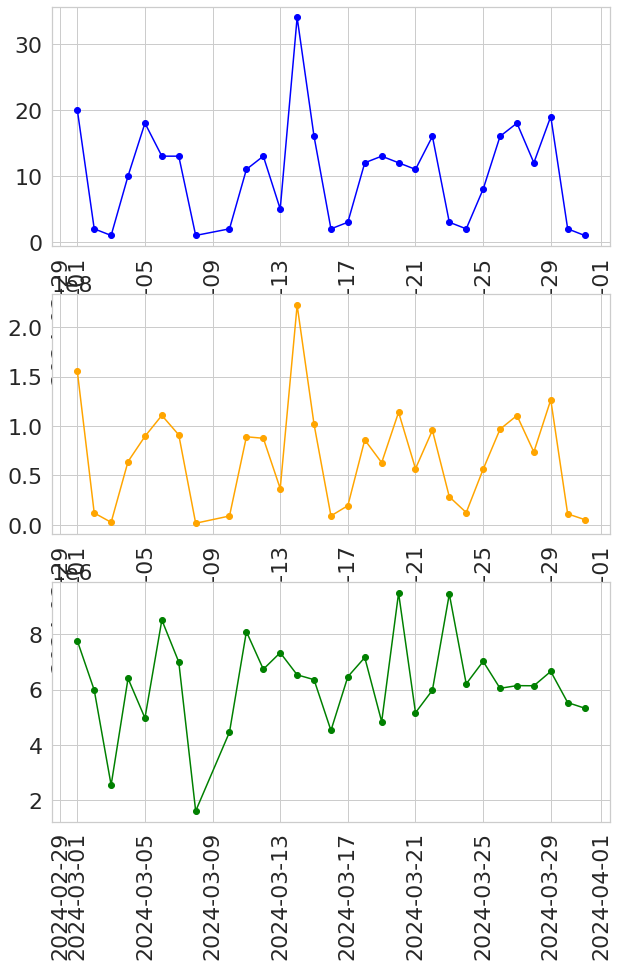

In [195]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(df_report_by_date['date'], df_report_by_date['orders'], marker='o', color='blue', label='orders')
axs[0].tick_params(axis='x', rotation=90) 
axs[1].plot(df_report_by_date['date'], df_report_by_date['revenue'], marker='o', color='orange', label='revenue')
axs[1].tick_params(axis='x', rotation=90) 
axs[2].plot(df_report_by_date['date'], df_report_by_date['aov'], marker='o', color='green', label='aov')
axs[0].tick_params(axis='x', rotation=90) 

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) В датафрейме `df_full` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке name и возьмите первое из них (сначала идет бренд и через запятую модель товара).

2) Посчитайте количество уникальных значений в колонке `brand`.
      
</p>
</details>

In [198]:
# Ваш код здесь
df_full['brand'] = df_full['name'].str.split(',').str[0]

In [203]:
unique_brands_count = df_full['brand'].nunique()

In [204]:
unique_brands_count

121

In [199]:
#df_full.head(2)

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue,brand
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,290228.966302,Heco
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,164356.057230,JBL


## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите в датафрейме `df_full` только подтвержденные заказы.

2) Сгруппируйте данные по брендам и посчитайте выручку и количество уникальных заказов.

3) Отсортируйте агрегированные данные по убыванию выручки и посмотрите бренд в верхней строчке.

4) Дополнительно: отсортируйте агрегированные данные по убыванию количество заказов и посмотрите бренд в верхней строчке.

</p>
</details>

In [213]:
# Ваш код здесь
df_full.query('status == "confirmed"')\
        .groupby('brand', as_index=False)\
        .agg({'order_id': 'nunique',
                 'revenue': 'sum'}) \
        .sort_values('revenue', ascending=False)\
        .sort_values('order_id', ascending=False)

,brand,order_id,revenue
46,JBL,264,2.665961e+08
43,Heco,229,2.388163e+08
120,Yamaha,218,1.658651e+08
53,Klipsch,205,2.039024e+08
62,Magnat,154,1.141989e+08
...,...,...,...
8,AudioSource,1,3.388167e+04
40,Fosi Audio,1,3.129419e+04
107,Technics,1,2.648291e+05
18,Bravo Audio,1,2.405086e+04


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сохраните в список `products_in_orders` уникальные идентификаторы товаров из датафрейма `df_confirmed`.
      
2) Создайте в датафрейме `df_products` новую колонку `is_in_orders`, в которой будет значение `yes`, если значение из колонки `id` этого датафрейма есть в списке `products_in_orders`. Если его в этом списке нет - в новую колонку для этой строчки запишите значение `no`.
      
3) Посчитайте количество встречающихся значений `yes` и  `no` в колонке `is_in_orders`.
      
</p>
</details>

In [217]:
# Ваш код здесь
products_in_orders = df_confirmed['product_id'].unique().tolist()

In [220]:
import numpy as np

df_products['is_in_orders'] = np.where(df_products['id'].isin(products_in_orders), 'yes', 'no')

In [221]:
df_products

,id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes
...,...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники,yes
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники,yes
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники,yes
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники,yes


In [222]:
counts = df_products['is_in_orders'].value_counts()

In [223]:
counts

yes    1180
no      497
Name: is_in_orders, dtype: int64

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) В датафрейме `df_products` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке `name` и возьмите первое из них (сначала идет бренд и через запятую модель товара).
      
2) Сгруппируйте данные по бренду и колонке, в которой указано, есть товар в заказах, и посчитайте число уникальных товаров. Колонку с числом товаров можете переименовать в `products`.
      
3) Разверните сгруппированные данные так, чтобы получилась сводная таблица в которой в индексе названия брендов, в колонках - есть товар в заказах или нет (`yes` и `no`), в значениях - количество товаров.
      
4) Заполните пропуски нулями.
      
5) Сбросьте индекс, чтобы названия брендов стали колонкой.
      
6) Посчитайте общее число товаров для каждого бренда, сложив значения в колонках `yes` и `no`.
      
7) Для каждого бренда посчитайте долю ни разу не заказанных товаров от всех продаваемых товаров этого бренда.
      
8) Отберите только те бренды, где общее число товаров больше 15 и доля ни разу не заказанных товаров больше половины (0.5).
      
</p>
</details>

In [225]:
df_products['brand'] = df_products['name'].str.split(',').str[0]

In [240]:
brend_ = df_products.groupby(['brand', 'is_in_orders'], as_index=False)\
             .agg({'id': 'nunique'})\
            .rename(columns={'id': 'products'})\
            .pivot(index='brand', columns='is_in_orders', values='products') \
             .fillna(0)\
            .reset_index()

In [241]:
brend_['total_products'] = brend_['yes'] + brend_['no']

In [243]:
brend_['no_order_ratio'] = brend_['no'] / brend_['total_products']

In [245]:
filtered_brands = brend_[(brend_['total_products'] > 15) & (brend_['no_order_ratio'] > 0.5)]

In [247]:
filtered_brands

is_in_orders,brand,no,yes,total_products,no_order_ratio
32,Dali,49.0,18.0,67.0,0.731343
60,KEF,54.0,28.0,82.0,0.658537
77,Marantz,19.0,3.0,22.0,0.863636
94,Pioneer,70.0,33.0,103.0,0.679612


In [246]:
brend_

is_in_orders,brand,no,yes,total_products,no_order_ratio
0,AKG,6.0,5.0,11.0,0.545455
1,ART,0.0,1.0,1.0,0.000000
2,ASUS,1.0,2.0,3.0,0.333333
3,Adam Audio,1.0,0.0,1.0,1.000000
4,Amazon,0.0,4.0,4.0,0.000000
...,...,...,...,...,...
141,Wharfedale,7.0,50.0,57.0,0.122807
142,Xiaomi,0.0,4.0,4.0,0.000000
143,YAQIN,1.0,0.0,1.0,1.000000
144,Yamaha,15.0,91.0,106.0,0.141509


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) Сгруппируйте данные с подтвержденными заказами из датафрейма `df_confirmed` по менеджерам и посчитайте для каждого сумму выручки и количество заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Отсортируйте записи по убыванию выручки.
      
3) Посчитайте процент выручки, приходящейся на каждого менеджера: разделите его выручку на суммарную выручку всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.
      
4) Посчитайте процент заказов, приходящихся на каждого менеджера: разделите его число заказов на суммарное число заказов всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.   
      
5) Постройте два барплота (столбиковые диаграммы): со значениями % выручки и % заказов у каждого менеджера.
      
</p>
</details>

In [279]:
# Ваш код здесь
df_manager = df_confirmed.groupby('manager', as_index=False) \
        .agg({'order_id': 'count',
                 'revenue': 'sum'}) \
        .rename(columns={'order_id': 'orders'})\
        .sort_values('revenue', ascending=False)

In [281]:
df_manager['per_revenue'] = round(df_manager['revenue'] / df_manager['revenue'].sum() * 100, 2)


In [282]:
df_manager['per_orders'] = round(df_manager['orders'] / df_manager['orders'].sum() * 100, 2)


In [283]:
df_manager

,manager,orders,revenue,per_revenue,per_orders
9,Маргарита Камертонова,678,3.473886e+08,17.04,16.61
4,Виктор Тромбонов,641,3.188999e+08,15.65,15.70
8,Максим Барабанов,502,2.401478e+08,11.78,12.29
5,Владимир Ударников,423,2.084865e+08,10.23,10.36
0,Алексей Саксофонов,391,1.953435e+08,9.58,9.58
7,Ксения Балалайкина,341,1.817621e+08,8.92,8.35
6,Екатерина Тарелкина,356,1.781576e+08,8.74,8.72
10,Надежда Гармошкина,254,1.347836e+08,6.61,6.22
1,Анастасия Дудкина,271,1.234504e+08,6.06,6.64
2,Антон Скрипкин,98,5.150268e+07,2.53,2.40


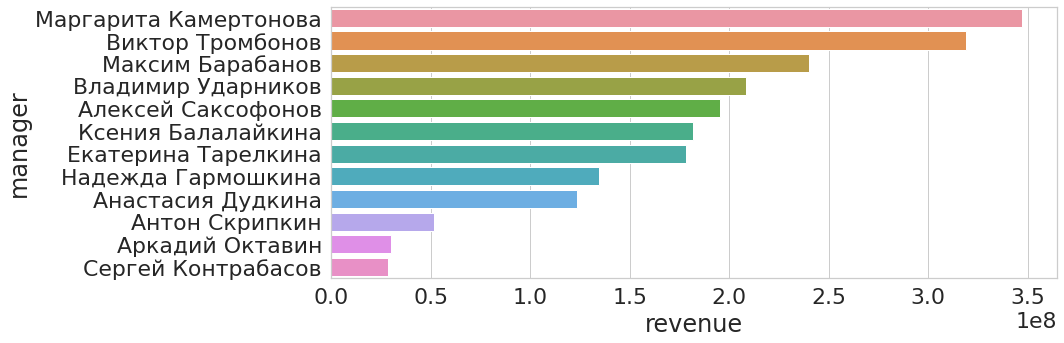

In [284]:
sns.barplot(data = df_manager, x = 'revenue', y = 'manager')

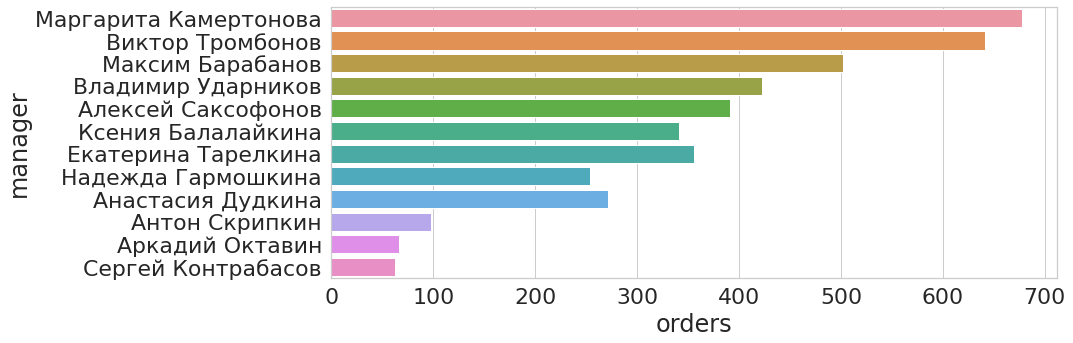

In [285]:
sns.barplot(data = df_manager, x = 'orders', y = 'manager')


## Итоги

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке». Вы проделали отличную работу!

Но если считаете, что можете больше, продолжайте анализ имеющихся данных самостоятельно. Например, посмотрите, в какие дни недели оформляется в среднем больше заказов; составьте более полный отчет по продажам каждого менеджера (учтите отмененные заказы); определите наиболее и наименее популярные/прибыльные категории товаров и т.п. Данные полны инсайтов! Но эти задания не оцениваются и по ним не осуществляется поддержка экспертов. Зато вы можете сделать эту работу своим пет-проектом :)